In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras.preprocessing.image as image_processor
from keras.applications import VGG16
from keras import backend as K
from keras.models import Model

Using TensorFlow backend.


In [3]:
model = VGG16(weights='imagenet',include_top=False)

In [22]:
def generate_pattern(layer_name, filter_index, size=150):
    #get the layer
    layer_output = model.get_layer(layer_name).output
    #let's take mean as the loss
    loss = K.mean(layer_output[:, :, :, filter_index])
    #gradient of the image with respect to this loss
    grads = K.gradients(loss, model.input)[0]
    #normalization
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3))*20 + 128.
    for i in range(1000):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value
    img = input_img_data[0]
    
    #make the image nice
    img -= img.mean()
    img /= (img.std() + 1e-5)
    img *= 0.1
    img += 0.5
    
    img = np.clip(img, 0, 1)
    img *= 255
    return img.astype('uint8')

In [10]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

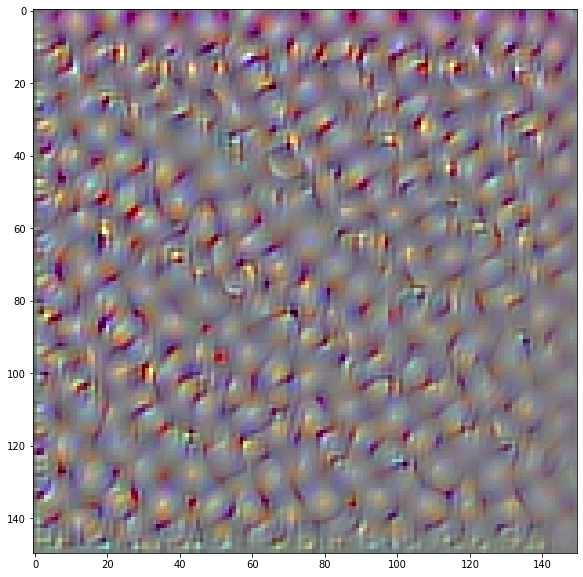

In [16]:
img = generate_pattern('block3_conv2', 0)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

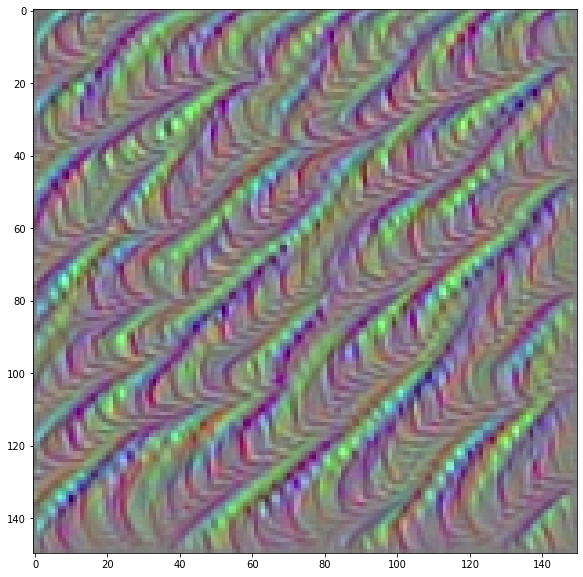

In [17]:
img = generate_pattern('block3_conv2', 10)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

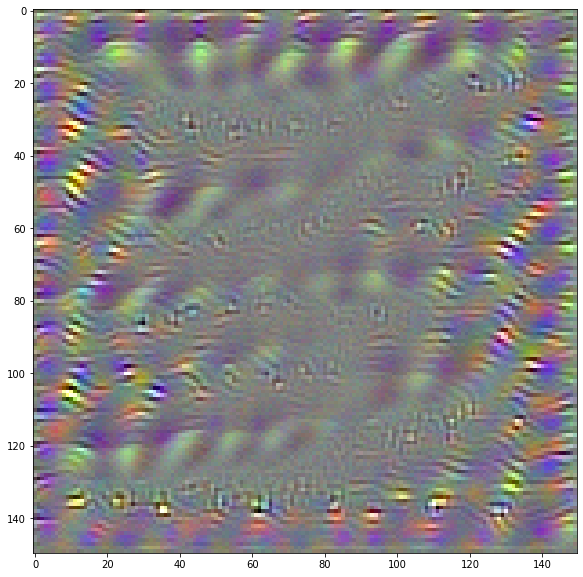

In [18]:
img = generate_pattern('block3_conv2', 20)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

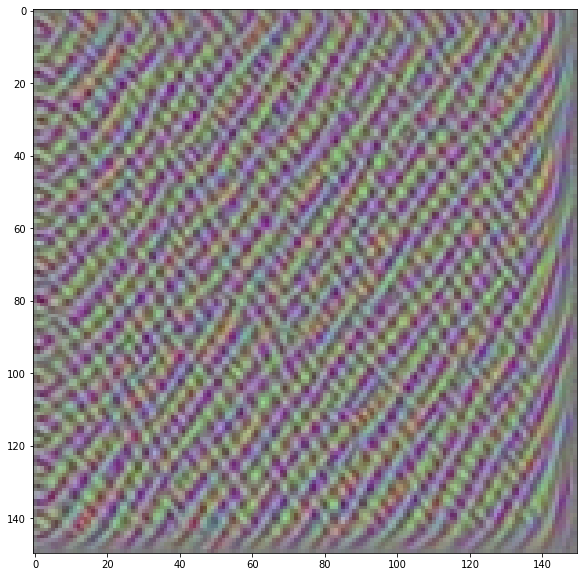

In [19]:
img = generate_pattern('block3_conv2', 200)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

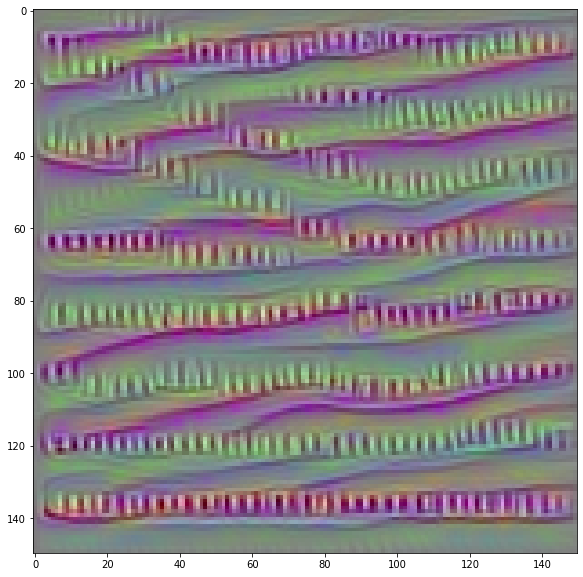

In [23]:
img = generate_pattern('block3_conv2', 235)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()